A pneumonia of unknown cause detected in Wuhan, China was first internationally reported from China on 31 December 2019. Today we know this virus as Coronavirus. COVID-19 which stands for **CO**rona**VI**rus Disease is the disease caused by this virus. Since then, the world has been engaged in the fight against this pandemic. Several measures have therefore been taken to "flatten the curve". We have consequently experienced social distancing and many people have passed away as well.

In the solidarity to face this unprecedented global crisis, several organizations did not hesitate to share several datasets allowing the conduction of several kinds of analysis in order to understand this pandemic.

It is natural for us to analyze these datasets by ourselves to answer questions since we cannot always rely on the news, and we are data scientists.

In this Project, we use [a dataset, from Kaggle](https://www.kaggle.com/lin0li/covid19testing), that we have prepared and made [available here for download](https://dq-content.s3.amazonaws.com/505/covid19.csv). This dataset was collected between the 20th of January and the 1st of June 2020. The purpose of this Project is to build our skills and understanding of the data analysis workflow by evaluating the COVID-19 situation through this dataset. At the end of this project, feel free to download the updated version of the dataset and take the same steps to analyze it.

Our analysis tries to provide an answer to this question: **Which countries have had the highest number of positive cases against the number of tests?**

[Solution](https://github.com/dataquestio/solutions/blob/master/Mission505Solutions.Rmd) to this guided project 

**Instructions**

To help readers gain context into our project, open a new R Markdown document and do the following:

* Add a title.
* Write a short introduction where we explain to readers in no more than two paragraphs:

    - What the project is about.
    - What your goal is in this project.

The dataset of our study contains daily & cumulative number of COVID-19 tests conducted, number of positive, hospitalized, recovered & death cases reported by country. In details here are the columns in the dataset:

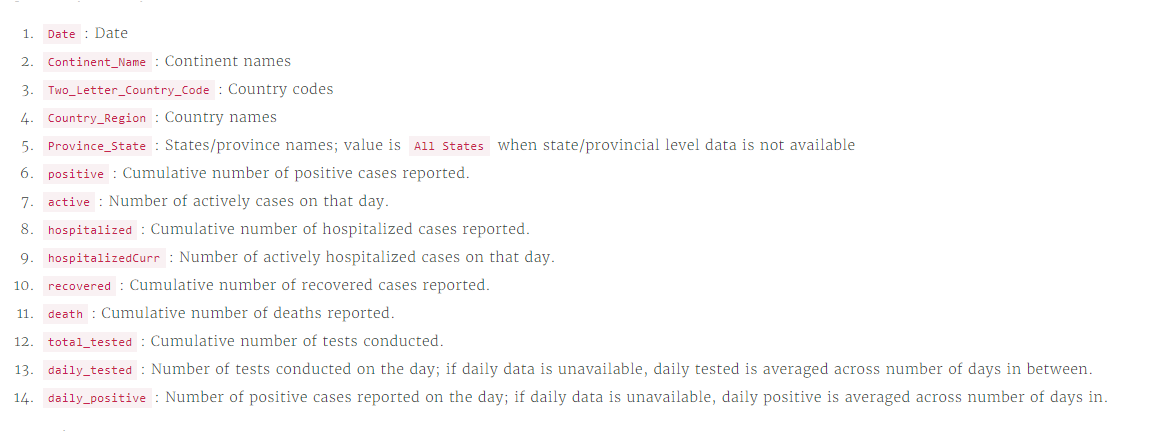

`library(readr)`

`# Loading the dataset
covid_df <- read_csv("covid19.csv")`

`# Displaing the dimension of the data: 
dim(covid_df)`

`# Storing the column names in a variable
vector_cols <- colnames(covid_df)`

`# Displaing the variable vector_cols
vector_cols`

`# Showing the first few rows of the dataset
head(covid_df)`

`# Showing a global view of the dataset.
library(tibble)
glimpse(covid_df)`

The dataset contains `14` columns and `10,903` rows. This database provides information on the numbers (per day and cumulatively) of COVID-19 positive cases, deaths, tests performed and hospitalizations for each country through the column's names store in the variable `vector_cols`. 

**Why is the `glimpse()` function useful when exploring a new dataset?**

1. This variable contains a character vector.

2. The use of the function `glimpse()` is the very first operation to do because we don't only learn about the dimensions of the database but also about the names of the first columns and their types and content. It can replace the three previous operations: `dim()`, `colnames()`, and `head()`.

We can see that the `Province_State` column mixes data from different levels: country level and state/province level. Since we cannot run an analysis on all these levels at the same time, we need to filter what we are interested in.

We will, therefore, extract only the country-level data in order to not bias our analyses. To do so, we filter the data to keep only the data related to `"All States"`. `"All States"` represents the value of the column `Province_State` to specify that the COVID-19 data is only available at the country level. 

At the end of the project we can come back to this step and do different kind of filtering, e.g., focus only on a country.

Filter the rows related to **"All States"** from the `Province_State` column and remove the `Province_State` column from covid_df dataframe.

`library(dplyr)
covid_df_all_states <- covid_df %>% 
  filter(Province_State == "All States") %>% 
  select(-Province_State)`


Revisiting the description of the dataset columns, we can notice that there are columns that provide daily information and others that provide cumulative information.

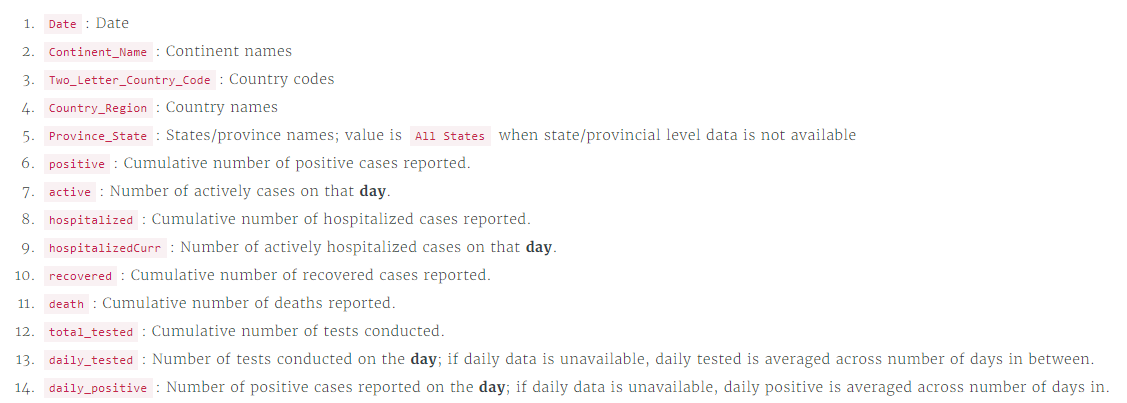

Hence, we should manage those cases (columns with cumulative and daily information) separately because we cannot work with both together. Actually, our analysis would be biased if we made the mistake of comparing a column containing cumulative data and another one containing only one-day data. This is another example of a situation that we want to know from the beginning of the project in order to better analyze our dataset.

Thereafter, we work mainly with daily data. So let's extract the columns related to the daily measures.

Selecting the following column, related to the daily measures, from the covid_df_all_states: `Date, Country_Region`, `active`, `hospitalizedCurr`, `daily_tested`, `daily_positive`.

`covid_df_all_states_daily <- covid_df_all_states %>% 
  select(Date, Country_Region, active, hospitalizedCurr, daily_tested, daily_positive)`
  
`head(covid_df_all_states_daily)`

Our goal here is to extract the **top ten cases countries data**. Acting like a data scientist, at this step, these are the questions we are asking ourselves.

* How can we get the overall number of COVID-19 tested, positive, active and hospitalized cases by country since we currently have daily data?
* How do we then extract the top ten?

The first question hides the notions of **group** (by country) and **data aggregation** (summing daily information). These two notions refer to the functions `group_by()` and `summarize()`.

The second question refers instead to the notion of order. The trick is that if we **arrange** the dataset by the number of tests performed the top ten represents the **first ten rows** of the arranged dataset. Accordingly, we can arrange the dataset using the function `arrange()` and use the function `head()` to extract the first ten rows.

`covid_df_all_states_daily_sum <- covid_df_all_states_daily %>% 
  group_by(Country_Region) %>% 
  summarise(tested = sum(daily_tested), 
            positive = sum(daily_positive),
            active = sum(active),
            hospitalized = sum(hospitalizedCurr)) %>% 
  arrange(desc(tested)) #this is equivalent to `arrange(-tested)`

`covid_top_10 <- head(covid_df_all_states_daily_sum, 10)
covid_top_10`

Our goal is to answer this question: **Which countries have had the highest number of positive cases against the number of tests?**

In order to reach our goal, the idea is to extract from the `covid_top_10` dataframe, vectors that allow us to perform specific operations.

`countries <- covid_top_10$Country_Region
tested_cases <- covid_top_10$tested
positive_cases <- covid_top_10$positive
active_cases <- covid_top_10$active
hospitalized_cases <- covid_top_10$hospitalized`

`names(positive_cases) <- countries
names(tested_cases) <- countries
names(active_cases) <- countries
names(hospitalized_cases) <- countries`

**Identify the top three positive against tested cases.**

`positive_cases/tested_cases`

`positive_tested_top_3 <- c("United Kingdom" = 0.11, "United States" = 0.10, "Turkey" = 0.08)`

Now Our goal is to find a way to keep all the information available for the top three countries that have had the highest number of positive cases against the number of tests.

To make sure we won't lose other information about these countries we can create a matrix that contains the ratio and the overall number of COVID-19 tested, positive, active and hospitalized cases.

`# Creating vectors
united_kingdom <- c(0.11, 1473672, 166909, 0, 0)
united_states <- c(0.10, 17282363, 1877179, 0, 0)
turkey <- c(0.08, 2031192, 163941, 2980960, 0)`

`# Creating the matrix covid_mat
covid_mat <- rbind(united_kingdom, united_states, turkey)`

`# Naming columns
colnames(covid_mat) <- c("Ratio", "tested", "positive", "active", "hospitalized")`

Our final goal is to put all our answers and datasets together. Since a list can contain several types of objects, we are able to store all the data of our project together. This allows us to have a global view from a single variable and the ability to export our results for other uses.

`# Creating a character variable named question that contains our question.`

`question <- "Which countries have had the highest number of positive cases against the number of tests?"`

`# Creating a named vector that contains our answer with the following command`

`answer <- c("Positive tested cases" = positive_tested_top_3)`

**Creating a list that contains different data structures**

`# Creating a list that contains the dataframes.`

`datasets <- list(
  original = covid_df,
  allstates = covid_df_all_states,
  daily = covid_df_all_states_daily,
  top_10 = covid_top_10
)`

`# Creating a list that contains the matrices.`

`matrices <- list(covid_mat)`

`# Creating a list that contains the matrices.`

`vectors <- list(vector_cols, countries)`

`# Creating a named list that contains the three previous lists associated with the data structure names.`

`data_structure_list <- list("dataframe" = datasets, "matrix" = matrices, "vector" = vectors)`

`# Create a list that contains the following lists: question, answer, and data_structure_list.`

`covid_analysis_list <- list(question, answer, data_structure_list)`

`# Display the second element of this list`

`covid_analysis_list[[2]]`